In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use# This  
from fastai.imports import *

In [3]:
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
arch=resnet34
PATH = "data/competitions/dog-breed-identification"
sz=224

In [ ]:
!unzip '*.zip'

In [5]:
label_csv = f'{PATH}/labels.csv'
n = len(list(open(label_csv)))-1
val_idx = get_cv_idxs(n)

In [6]:
data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}/labels.csv', tfms=tfms_from_model(arch, sz), val_idxs=val_idx, suffix='.jpg', test_name='test')

In [9]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 162/162 [00:58<00:00,  2.62it/s]


In [37]:
learn.fit(0.01, 10)

epoch      trn_loss   val_loss   accuracy   
    0      0.180544   0.635875   0.834638  
    1      0.145827   0.632013   0.837573  
    2      0.1514     0.634513   0.835127  
    3      0.133401   0.642123   0.84002   
    4      0.132008   0.63373    0.838063  
    5      0.131025   0.633098   0.836595  
    6      0.133054   0.637505   0.837573  
    7      0.115947   0.624871   0.837573  
    8      0.119447   0.639232   0.841487  
    9      0.115564   0.637113   0.836106  



[array([0.63711]), 0.8361056752634142]

In [13]:
data.test_ds.fnames[:10]

['test/f1705303b30da3a48db2a5f34376b947.jpg',
 'test/a9b79809bc1301f8d148e15bfecf6485.jpg',
 'test/cc94a3bb7191a247f59e1540d8430c93.jpg',
 'test/f7b489a38302afc010d8a386a1b7d085.jpg',
 'test/6e21c96226078576342ca66e25eb1aa9.jpg',
 'test/f16eed64196d24c423f0a68d7ebf287d.jpg',
 'test/635f438cd68b65dd6b4e100b338015fd.jpg',
 'test/b827855f566b9569fd668d990854ad0b.jpg',
 'test/5d1e83adfaac47f754f16021615fc8bf.jpg',
 'test/8a08c0b0d4554a270f66f2f16278ee70.jpg']

In [14]:
log_preds, y = learn.predict_with_targs(is_test=True) # use test dataset rather than validation dataset
probs = np.exp(log_preds)

In [15]:
probs.shape # (n_images, n_classes)

(10357, 120)

In [16]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [28]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [29]:
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])

In [30]:
df.head()
len(df)

10357

In [31]:
SUBM = f'/content/clouderizer/cs152/data/competitions/dog-breed-identification/out/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}dog_breed_identification_result.gz', compression='gzip', index=False)

In [32]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [33]:
lrf=learn.lr_find()

 86%|████████▌ | 110/128 [00:01<00:00, 55.09it/s, loss=3.48]


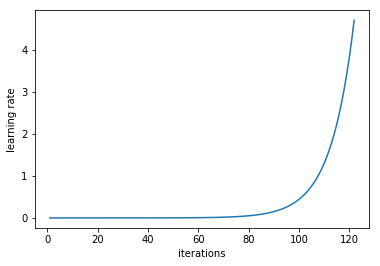

In [34]:
learn.sched.plot_lr()

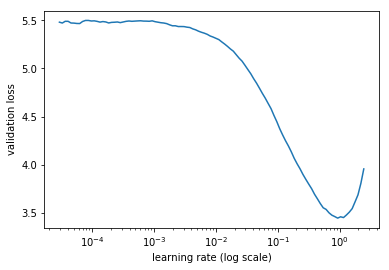

In [35]:
learn.sched.plot()

epoch      trn_loss   val_loss   accuracy   
    0      1.25692    0.710885   0.781311  
    1      0.785446   0.582746   0.831703  
    2      0.578058   0.623911   0.818982  
    3      0.510195   0.646697   0.808708  
    4      0.411688   0.61061    0.831213  
    5      0.380732   0.619239   0.829746  
    6      0.34523    0.675607   0.812133  
    7      0.305531   0.678879   0.817515  
    8      0.274576   0.659907   0.825342  
    9      0.271302   0.700632   0.819961  



[array([0.70063]), 0.8199608608234652]

Data augmentation

In [38]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [43]:
def  get_augs():
    data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}/labels.csv', tfms=tfms, val_idxs=val_idx, suffix='.jpg', test_name='test')
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [44]:
ims = np.stack([get_augs() for i in range(6)])

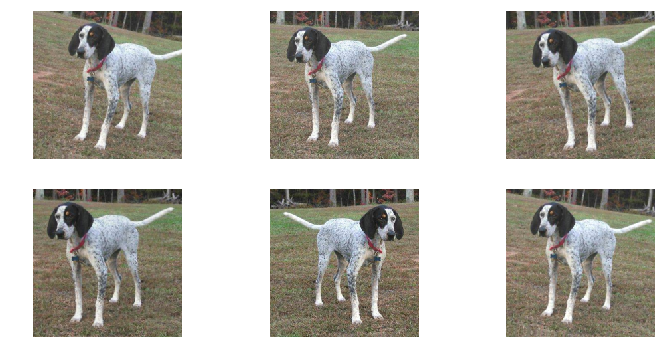

In [45]:
plots(ims, rows=2)

In [47]:
data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}/labels.csv', tfms=tfms, val_idxs=val_idx, suffix='.jpg', test_name='test')
learn = ConvLearner.pretrained(arch, data)

In [ ]:
learn.fit(1e-2, 10, cycle_len=1)